### Section 1: Data Reading

We need the following libraries:

In [2]:
install.packages(c("plotrix", "dplyr"))

package 'plotrix' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Gabriel\AppData\Local\Temp\RtmpEztSog\downloaded_packages


In [4]:
library(dplyr)
library(plotrix)

I'm loading both the Auth and the Proc lists of compromised usernames locally. They can be found [here for the Auth](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Data/AuthUserNames.txt), respectively [here for the Proc](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Data/ProcessUserNames.txt).

In [5]:
#setwd("D://LA//ATI Data")
setwd("G://Users//Gabriel//Documents//Education//UoB//GitHubDesktop//Advanced-Cyber-Analytics-for-Attack-Detection//Data")

In [6]:
AU <- read.table(file="AuthUserNames.txt", header=F)
PU <- read.table(file="ProcessUserNames.txt", header=F)

We'll read them as vectors and have a look at them. It's likely they contain duplicate usernames, so that will too be addressed.

In [7]:
AU <- as.vector(AU$V1)
PU <- as.vector(PU$V1)

head(AU)
length(AU)
head(PU)
length(PU)

[1] "User024511" "User063197" "User203147" "User365588" "User409683"
[6] "User538831"

[1] 99

[1] "User179746"  "Comp599155$" "User317732"  "AppService"  "Comp931233$"
[6] "User553613"

[1] 71

In [8]:
AU <- unique(AU)
PU <- unique(PU)

length(AU)
length(PU)

[1] 95

[1] 66

We now read the interesction and union of these lists, viewed as sets of usernames:

In [9]:
OnlyAuth <- AU[AU%in%PU==FALSE]
paste("There are", length(OnlyAuth), "usernames present in Auth that do not feature in Proc")
cat("\nSuch as:\n")
print(head(OnlyAuth))

OnlyProc <- PU[PU%in%AU==FALSE]
paste("There are", length(OnlyProc), "usernames present in Proc that do not feature in Auth")
cat("\nSuch as:\n")
print(head(OnlyProc))

[1] "There are 87 usernames present in Auth that do not feature in Proc"


Such as:
[1] "User024511" "User063197" "User365588" "User409683" "User538831"
[6] "User768610"


[1] "There are 58 usernames present in Proc that do not feature in Auth"


Such as:
[1] "Comp599155$" "Comp931233$" "User553613"  "Comp513140$" "Comp591296$"
[6] "Comp123959$"


We print the intersection, which is what we'll be using for our analysis:

In [10]:
Common <- AU[AU%in%PU==TRUE]
identical(Common[order(Common)], PU[PU%in%AU==TRUE][order(PU[PU%in%AU==TRUE])], attrib.as.set = TRUE)

print(Common)

[1] TRUE

[1] "User203147"  "User794682"  "User317732"  "User179746"  "User110290" 
[6] "AppService"  "Comp289117$" "Comp939275$"


_Note:_ Anything that does NOT feature within the interesction set, i.e. 'Common', seems harder to approach. However, I strongly believe it's the other way around. That is because Proc is mostly made up of anonymized usernames as CompX$ acting on CompX - so following which of the usernames within the list 'AU' acted on CompX should easily clarify the link between the two datasets in this case.

We'll now read the full Authentication and Processes datasets, which can be found [here for Auth](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Data/Authentication%20data.gz), respectively [here for Proc](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Data/Process%20data.gz).

In [11]:
#Auth <- read.table(file="Summaries//Just_Auth//LA.txt", header=T, sep=",")
Auth <- read.table(file="Authentication data.gz", header=T, sep=",")

In [12]:
#Proc <- read.table(file="Summaries//Just_Process//ProcessData.txt", header=T, sep=",")
Proc <- read.table(file="Process data.gz", header=T, sep=",")

The following line might not apply to you, depending on whether the editing tool added an extra counting column or not. Please verify using head() before running:

In [13]:
head(Proc)
head(Auth)

,X,UserName,Device,ProcessName,ParentProcessName,DailyCount
,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
2,1,Comp563664$,Comp563664,rundll32.exe,services,1
3,2,User607396,Comp609111,Proc417435.exe,Proc417435,1
4,3,Comp641702$,Comp641702,Proc249569.exe,services,1
5,4,Comp157389$,Comp157389,Proc402696.exe,services,1
6,5,Comp664825$,Comp664825,Proc402696.exe,services,1


,X,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,0,User035855,Comp808475,Comp081330,TGS,0,17
2,1,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
3,2,User762066,Comp306129,ActiveDirectory,TGS,0,22
4,3,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
5,4,User043263,Comp883307,Comp384394,TGS,0,2
6,5,User631552,Comp621781,Comp915658,NetworkLogon,0,1


In [14]:
Proc <- Proc[, -1]
Auth <- Auth[, -1]

In [15]:
head(Auth)
head(Proc)

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,User035855,Comp808475,Comp081330,TGS,0,17
2,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
3,User762066,Comp306129,ActiveDirectory,TGS,0,22
4,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
5,User043263,Comp883307,Comp384394,TGS,0,2
6,User631552,Comp621781,Comp915658,NetworkLogon,0,1


,UserName,Device,ProcessName,ParentProcessName,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>
1,Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
2,Comp563664$,Comp563664,rundll32.exe,services,1
3,User607396,Comp609111,Proc417435.exe,Proc417435,1
4,Comp641702$,Comp641702,Proc249569.exe,services,1
5,Comp157389$,Comp157389,Proc402696.exe,services,1
6,Comp664825$,Comp664825,Proc402696.exe,services,1


We now isolate the 'Malicious' data by referring only to those usernames which feature in the AU, and the PU lists respectively.

In [16]:
MalAuth <- Auth[Auth$UserName%in%AU, ]
MalProc <- Proc[Proc$UserName%in%PU, ]

dim(MalAuth)
dim(MalProc)

[1] 151819      6

[1] 230189      5

Lastly, we make use of the 'Common' list to identify those actors which move from Auth to Proc carrying on the same credentials:

In [17]:
CommAuth <- Auth[Auth$UserName%in%Common, ]
CommProc <- Proc[Proc$UserName%in%Common, ]

dim(CommAuth)
dim(CommProc)

[1] 24269     6

[1] 35092     5

In [19]:
head(MalAuth)
head(MalProc)

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
129,AppService,EnterpriseAppServer,Comp947445,TGS,0,2
468,User871458,Comp273168,Comp273168,TGS,0,6
584,User882755,Comp599337,ActiveDirectory,TGS,0,51
764,User718825,Comp544870,Comp370444,NetworkLogon,0,25
903,User538831,Comp277798,None,WorkstationLock,0,1
1018,AppService,Comp894088,Comp698972,NetworkLogon,0,110063


,UserName,Device,ProcessName,ParentProcessName,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>
63,ActiveDirectory$,ActiveDirectory,Proc536347.exe,services,7
263,User200830,Comp258078,Proc363817.exe,Proc363817,6
628,EnterpriseAppServer$,EnterpriseAppServer,Proc266252.exe,services,2
1114,Comp697805$,Comp697805,wmiprvse.exe,svchost,219
1787,EnterpriseAppServer$,EnterpriseAppServer,Proc595451.exe,svchost,14
2126,Comp939275$,Comp939275,Proc676117.exe,svchost,3


In [20]:
head(CommAuth)
head(CommProc)

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
129,AppService,EnterpriseAppServer,Comp947445,TGS,0,2
1018,AppService,Comp894088,Comp698972,NetworkLogon,0,110063
2602,AppService,Comp154659,None,Batch,0,2
2831,AppService,Comp093748,ActiveDirectory,TGS,0,4
4573,User317732,Comp380829,Comp995183,NetworkLogon,0,1
4810,Comp939275$,Comp939275,Comp239094,TGS,0,3


,UserName,Device,ProcessName,ParentProcessName,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>
2126,Comp939275$,Comp939275,Proc676117.exe,svchost,3
2991,Comp939275$,Comp939275,Proc955947.exe,services,1
7325,AppService,Comp888702,Proc412499.exe,Proc811977,1
8502,User317732,Comp380829,Proc412499.exe,Proc003494,14
8965,Comp289117$,Comp289117,conhost.exe,csrss,58
9154,AppService,EnterpriseAppServer,Proc412499.exe,Proc796467,4


We'll change all factors to characters so that we can work with them, and then evaluate the tables of our results regarding the common usernames between the two datasets:

In [21]:
CommAuth %>% mutate(across(where(is.factor), as.character)) -> CommAuth
CommProc %>% mutate(across(where(is.factor), as.character)) -> CommProc
MalAuth %>% mutate(across(where(is.factor), as.character)) -> MalAuth
MalProc %>% mutate(across(where(is.factor), as.character)) -> MalProc

In [22]:
head(CommAuth)

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
129,AppService,EnterpriseAppServer,Comp947445,TGS,0,2
1018,AppService,Comp894088,Comp698972,NetworkLogon,0,110063
2602,AppService,Comp154659,None,Batch,0,2
2831,AppService,Comp093748,ActiveDirectory,TGS,0,4
4573,User317732,Comp380829,Comp995183,NetworkLogon,0,1
4810,Comp939275$,Comp939275,Comp239094,TGS,0,3


In [23]:
table(CommAuth$UserName)[order(table(CommAuth$UserName))]
cat("\n")
table(CommProc$UserName)[order(table(CommProc$UserName))]


 User179746  User794682 Comp289117$  User317732  User203147 Comp939275$ 
         57         165         488        1328        1414        2072 
 User110290  AppService 
       2954       15791 


 User179746  User794682  User317732  User110290 Comp289117$  User203147 
        188         582        1437        2423        3224        4672 
Comp939275$  AppService 
       4891       17675 

Lastly, let's visualise our results:

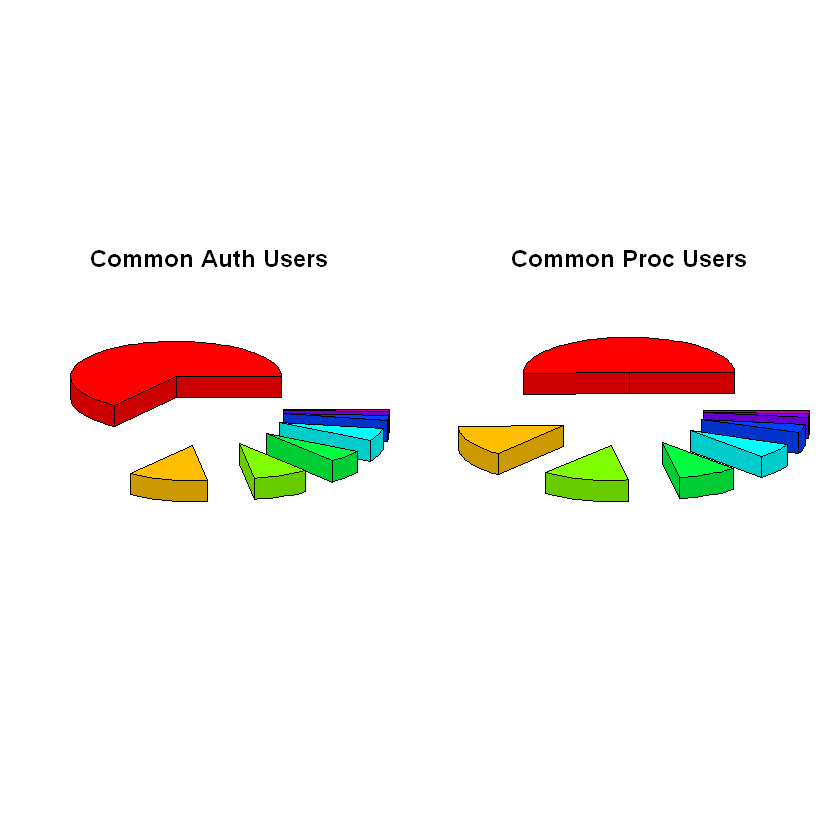

In [24]:
op <- par(mfrow=c(1,2))
pie3D(table(CommAuth$UserName)[order(table(CommAuth$UserName), decreasing=TRUE)], col=rainbow(8), main="Common Auth Users", explode=0.7)
pie3D(table(CommProc$UserName)[order(table(CommProc$UserName), decreasing=TRUE)], col=rainbow(8), main="Common Proc Users", explode=0.7)
par(op)

### Section 2: Case-by-case analysis of common usernames

## User179746

We'll use this username as our testing ground for developing a method for analysis. We do know what we want to obtain off it, which is identifying to some degree of confidence what stage of the kill chain would the attacks be placed into. We note that we'll have to accept some degree of false positives in the process, but hopefully not so much so that they'll hinder our conclusions. The verdict placing the attack into one or more potential stages of the killchain is expressed at the end of each analysis with the following degrees of certainty:

- _Very likely_: I strongly believe this is the case, though there is no path to absolute certainty yet.

- _Quite likely_: I believe this is the case, though some doubts based on lack of sufficient data or competing views emerged.

- _Somewhat likely_: There is a chance that this is the case provided our analysis, though more work is encouraged.

- _Little likely_: It's hopefully better than guessing that this is the case, though a vast amount of speculation is involved in drawing this conclusion.



In [25]:
U1<- CommAuth[CommAuth$UserName=='User179746', ]
U2<- CommProc[CommProc$UserName=='User179746', ]

head(U1)
head(U2)

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
2309303,User179746,Comp599155,None,InteractiveLogon,0,2
6027757,User179746,Comp599155,None,InteractiveLogon,0,2
6889517,User179746,Comp599155,None,InteractiveLogon,0,2
9667214,User179746,Comp679250,Comp599155,NetworkLogon,0,8
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9727819,User179746,Comp679250,Comp599155,RemoteInteractive,0,8


,UserName,Device,ProcessName,ParentProcessName,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>
3642629,User179746,Comp599155,Proc706548.exe,Proc444602,2
3709166,User179746,Comp599155,Proc604969.exe,Proc444602,1
3841198,User179746,Comp599155,Proc412499.exe,Proc444602,2
3852765,User179746,Comp599155,Proc407594.exe,Proc412499,2
7683119,User179746,Comp599155,Proc447231.exe,Proc442764,1
7742208,User179746,Comp599155,Proc690950.exe,Proc089893,1


In [26]:
U1F <- U1[U1$Failure==1, ]
head(U1F)   ## Note: Assign really large weight to Failure!

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9779940,User179746,Comp679250,Comp599155,NetworkLogon,1,3
9866675,User179746,Comp599155,Comp936659,NetworkLogon,1,6
9884093,User179746,Comp599155,Comp422203,NetworkLogon,1,3
9884731,User179746,Comp599155,EnterpriseAppServer,NetworkLogon,1,12
9885162,User179746,Comp599155,Comp312245,NetworkLogon,1,6


In [27]:
table(U1$SrcDevice)
table(U2$Device)


Comp215429 Comp547871 Comp599155 Comp679250 
         1          3         45          8 


Comp547871 Comp599155 
        18        170 

In [28]:
U1Src <- as.vector(unique(U1$SrcDevice))
U2Src<- as.vector(unique(U2$Device))

CommDev <- U1Src[U1Src%in%U2Src]
U1_investig <- U1[U1$SrcDevice%in%CommDev, ]
U2_investig <- U2[U2$Device%in%CommDev, ]

In [29]:
head(U1_investig)
dim(U1_investig)
head(U2_investig)
dim(U2_investig)

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
2309303,User179746,Comp599155,None,InteractiveLogon,0,2
6027757,User179746,Comp599155,None,InteractiveLogon,0,2
6889517,User179746,Comp599155,None,InteractiveLogon,0,2
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9866675,User179746,Comp599155,Comp936659,NetworkLogon,1,6
9884093,User179746,Comp599155,Comp422203,NetworkLogon,1,3


[1] 48  6

,UserName,Device,ProcessName,ParentProcessName,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>
3642629,User179746,Comp599155,Proc706548.exe,Proc444602,2
3709166,User179746,Comp599155,Proc604969.exe,Proc444602,1
3841198,User179746,Comp599155,Proc412499.exe,Proc444602,2
3852765,User179746,Comp599155,Proc407594.exe,Proc412499,2
7683119,User179746,Comp599155,Proc447231.exe,Proc442764,1
7742208,User179746,Comp599155,Proc690950.exe,Proc089893,1


[1] 188   5

In [30]:
dim(Auth[Auth$AuthType=='InteractiveLogon' & Auth$DstDevice!='None', ]) ## So InteractiveLogon=='None' DstDevice
dim(Auth[Auth$AuthType!='InteractiveLogon' & Auth$DstDevice=='None', ])

dim(Auth[Auth$AuthType!='InteractiveLogon' & Auth$DstDevice=='None' & Auth$UserName%in%AU,])

[1] 0 6

[1] 0 6

[1] 0 6

In [31]:
dim(Auth[Auth$AuthType=='InteractiveLogon' & Auth$Failure==1, ])
dim(Auth[Auth$AuthType=='InteractiveLogon' & Auth$Failure==1 & Auth$UserName%in%AU, ]) ## Some local logons are from the Mal list but most are not 

[1] 0 6

[1] 0 6

In [33]:
# U1_investig <- U1_investig[if(U1_investig$Failure==0) {U1_investig$AuthType!='Interactive Logon'}, ]
        ## Trying to remove the instances of successfull interactive logon
        ### Don't want to remove if it failed!

In [32]:
U1_investig

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
2309303,User179746,Comp599155,None,InteractiveLogon,0,2
6027757,User179746,Comp599155,None,InteractiveLogon,0,2
6889517,User179746,Comp599155,None,InteractiveLogon,0,2
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9866675,User179746,Comp599155,Comp936659,NetworkLogon,1,6
9884093,User179746,Comp599155,Comp422203,NetworkLogon,1,3
9884731,User179746,Comp599155,EnterpriseAppServer,NetworkLogon,1,12
9885162,User179746,Comp599155,Comp312245,NetworkLogon,1,6
9892426,User179746,Comp599155,Comp979071,NetworkLogon,1,12


Conclusions: This one will easily be picked up based entirely off Failure. The only AuthType which presents itself as part of the attack is 'NetworkLogon'.

Verdict: _Somewhat likely_ the attacks correspond to **Stage 1: Reconnaissance** and also _somewhat likely_ the attacks correspond to **Stage 7: Lateral movement**

In [38]:
options("width"=200)

## User794682

In [42]:
IsolatingMal <- function(x='User794682', n=5) {
    options("width"=200) 
    U1<- CommAuth[CommAuth$UserName==x, ]
    U2<- CommProc[CommProc$UserName==x, ]

    table(U1$SrcDevice)
    table(U2$Device)

    U1Src <- as.vector(unique(U1$SrcDevice))
    U2Src<- as.vector(unique(U2$Device))
    CommDev <- U1Src[U1Src%in%U2Src]
    U1_investig <- U1[U1$SrcDevice%in%CommDev, ]
    U2_investig <- U2[U2$Device%in%CommDev, ]
    
     if(n>min(c(nrow(U1_investig), nrow(U2_investig)))) {
        print(warning("Requested amount exceeds available size."))
    }

    print(head(U1_investig, n))
    print(paste("The number of suspect Auths is", nrow(U1_investig)))
    cat("\n")
    print(head(U2_investig, n))
    cat("\n")
    print(paste("The number of suspect Procs is", nrow(U2_investig)))
    cat("\n")
    cat("The common devices are:\n") 
    print(unique(U1_investig$SrcDevice))
    cat("\n")
    options("width"=100)
    cat("With Auth frequencies:\n")
    print(table(U1_investig$SrcDevice)[order(table(U1_investig$SrcDevice), decreasing=TRUE)])
    cat("\n")
    cat("And Proc frequencies:\n")
    print(table(U2_investig$Device)[order(table(U2_investig$Device), decreasing=TRUE)])
    
    t<- readline(prompt="Is the information sufficient? Y/N:  ")
    if(t=='N')
        {
        print(head(U1_investig[U1_investig$Failure==1, ], n))
        cat("\n")
        print(paste("The number of times Auth fails is", nrow(U1_investig[U1_investig$Failure==1, ])))
        
        t<- readline(prompt="Is the information sufficient? Y/N:  ")
        if(t=='N') {
            df<- U1_investig[U1_investig$Failure==1, ]
            print(table(df$AuthType[order(df$AuthType, decreasing=FALSE)]))
        }
    }
    if(t=='Y')
        cat("\nEnd of analysis.")
    }

In [34]:
IsolatingMal()

Is the information sufficient? Y/N:   n


         UserName  SrcDevice       DstDevice      Authent.Type Failure
759822 User794682 Comp679250      Comp679250               TGS       0
761120 User794682 Comp679250 ActiveDirectory               TGS       0
789856 User794682 Comp679250            None  InteractiveLogon       0
797499 User794682 Comp679250            None CachedInteractive       1
830442 User794682 Comp679250 ActiveDirectory      NetworkLogon       0
       DailyCount
759822         11
761120          3
789856         20
797499         10
830442          1
[1] "The number of suspect Auths is 124"

          UserName     Device    ProcessName ParentProcessName DailyCount
2124311 User794682 Comp679250 Proc312464.exe    Proc312464.exe          2
2126077 User794682 Comp679250    conhost.exe           cmd.exe          1
2128223 User794682 Comp679250 Proc318550.exe    Proc900938.exe          1
2137400 User794682 Comp679250 Proc916175.exe    Proc318550.exe          1
2181229 User794682 Comp679250 Proc028520.exe    Proc02

In [40]:
IsolatingMal(n=25)

Is the information sufficient? Y/N:   N
Is the information sufficient? Y/N:   N


          UserName  SrcDevice       DstDevice      Authent.Type Failure DailyCount
759822  User794682 Comp679250      Comp679250               TGS       0         11
761120  User794682 Comp679250 ActiveDirectory               TGS       0          3
789856  User794682 Comp679250            None  InteractiveLogon       0         20
797499  User794682 Comp679250            None CachedInteractive       1         10
830442  User794682 Comp679250 ActiveDirectory      NetworkLogon       0          1
1246255 User794682 Comp679250      Comp056180               TGS       0          1
1273517 User794682 Comp679250            None  InteractiveLogon       1          1
1377390 User794682 Comp679250            None  InteractiveLogon       0         10
1382536 User794682 Comp679250      Comp056180      NetworkLogon       0          1
1385389 User794682 Comp679250            None CachedInteractive       1          6
1418265 User794682 Comp679250      Comp679250               TGS       0          6
1440

ERROR: Error in order(df$AuthType, decreasing = FALSE): argument 1 is not a vector


Conclusions: The user uses a single device for authentication as well as for processes. Within Auth, they send TGS requests without prior ticket granting (TGT), which is suspicious. However, those never fail. They always fail the CachedInteractive authentication however, which is explained in the Data description as " logging on when away from the network, uses cached credentials." The user seems to be attempting all sorts of processes for later use.

Verdict: _Somewhat likely_ the attacks correspond to **Stage 1: Reconnaisance**. _Little likely_ the attacks correspond to **Stage 7: Lateral movement** (Because not many distinct DstDevices)

## Comp289117$

In [38]:
IsolatingMal(x='Comp289117$', n=50)

Is the information sufficient? Y/N:  Y
           UserName  SrcDevice       DstDevice Authent.Type Failure DailyCount
48214   Comp289117$ Comp289117      Comp289117          TGS       0         20
119144  Comp289117$ Comp289117 ActiveDirectory NetworkLogon       0        271
120901  Comp289117$ Comp289117 ActiveDirectory          TGS       0         40
156569  Comp289117$ Comp289117 ActiveDirectory          TGT       0          9
298649  Comp289117$ Comp289117      Comp289117          TGS       0         23
325110  Comp289117$ Comp289117 ActiveDirectory NetworkLogon       0        265
327191  Comp289117$ Comp289117 ActiveDirectory          TGS       0         39
370251  Comp289117$ Comp289117 ActiveDirectory          TGT       0          7
427834  Comp289117$ Comp289117      Comp289117          TGS       0         20
543453  Comp289117$ Comp289117 ActiveDirectory NetworkLogon       0        274
545553  Comp289117$ Comp289117 ActiveDirectory          TGS       0         37
588758  Comp2

Interestingly, the base analysis isn't fruitful in this case. We'll have to use the in-depth approach of identifying failures:

In [40]:
IsolatingMal(x='Comp289117$', n=20)

Is the information sufficient? Y/N:  N
Is the information sufficient? Y/N:  N
          UserName  SrcDevice       DstDevice Authent.Type Failure DailyCount
48214  Comp289117$ Comp289117      Comp289117          TGS       0         20
119144 Comp289117$ Comp289117 ActiveDirectory NetworkLogon       0        271
120901 Comp289117$ Comp289117 ActiveDirectory          TGS       0         40
156569 Comp289117$ Comp289117 ActiveDirectory          TGT       0          9
298649 Comp289117$ Comp289117      Comp289117          TGS       0         23
325110 Comp289117$ Comp289117 ActiveDirectory NetworkLogon       0        265
327191 Comp289117$ Comp289117 ActiveDirectory          TGS       0         39
370251 Comp289117$ Comp289117 ActiveDirectory          TGT       0          7
427834 Comp289117$ Comp289117      Comp289117          TGS       0         20
543453 Comp289117$ Comp289117 ActiveDirectory NetworkLogon       0        274
545553 Comp289117$ Comp289117 ActiveDirectory          TGS      

ERROR: Error in order(df$AuthType, decreasing = FALSE): argument 1 is not a vector


Conclusions: This username was likely not conducting any malicious activity for the most part. Notably, all failures start at timestamp 11315460 and end at timestamp 11531810 (based on the failures indicated by the IDS in place). Logins however start as early as 48214. It's fairly reasonable to conclude that this username has become corrupted in the second half of the 90 days period, and possibly acted as a non-primary attempt of an attacker (eg. other means failed or were detected, so the attacker resorted to this). This is also backed by the fact that within the failures, there are 13 entries with as many distinct DstDevices - indicating lateral movement rather than a first attempt at infiltration. 

Verdict: _Very likely_ the attacker was conducting **Stage 7: Lateral Movement**. 

## User317732

In [41]:
IsolatingMal(x='User317732', n=20)

Is the information sufficient? Y/N:  Y
         UserName  SrcDevice       DstDevice Authent.Type Failure DailyCount
4573   User317732 Comp380829      Comp995183 NetworkLogon       0          1
26326  User317732 Comp380829      Comp370444          TGS       0          3
31493  User317732 Comp380829 ActiveDirectory          TGS       0         40
75002  User317732 Comp380829      Comp303229          TGS       0          1
77830  User317732 Comp380829 ActiveDirectory          TGT       0          6
91379  User317732 Comp380829 ActiveDirectory NetworkLogon       0        599
92828  User317732 Comp380829      Comp384394          TGS       0          1
124889 User317732 Comp380829      Comp370444 NetworkLogon       0         24
139814 User317732 Comp380829      Comp380829          TGS       0          1
143787 User317732 Comp380829      Comp788417          TGS       0          6
174269 User317732 Comp380829      Comp995183          TGS       0          3
198348 User317732 Comp380829 ActiveDi

Although the connections aren't massively interesting, Comp380829 clearly features more than any other within these connections. It's clear we require the in-depth analysis:

In [43]:
IsolatingMal(x='User317732', n=10)

Is the information sufficient? Y/N:  N
Is the information sufficient? Y/N:  Y
         UserName  SrcDevice       DstDevice Authent.Type Failure DailyCount
4573   User317732 Comp380829      Comp995183 NetworkLogon       0          1
26326  User317732 Comp380829      Comp370444          TGS       0          3
31493  User317732 Comp380829 ActiveDirectory          TGS       0         40
75002  User317732 Comp380829      Comp303229          TGS       0          1
77830  User317732 Comp380829 ActiveDirectory          TGT       0          6
91379  User317732 Comp380829 ActiveDirectory NetworkLogon       0        599
92828  User317732 Comp380829      Comp384394          TGS       0          1
124889 User317732 Comp380829      Comp370444 NetworkLogon       0         24
139814 User317732 Comp380829      Comp380829          TGS       0          1
143787 User317732 Comp380829      Comp788417          TGS       0          6
[1] "The number of suspect Auths is 967"

          UserName     Device    

Interestingly enough, there were very few failures in these exchanges. Comp380829 and 'EnterpriseAppServer' are the actors involved in them, and they're also the most frequent authenticators.

Conclusions: This is the most complicated case so far, where nothing seems to be indicating anomalous events. Apart from the first failure, all others take place between timestamps 10199007 and 11432288 which form a somewhat restrained interval. These may or may not be indicative of an attack, though I'm personally inclined to believe the former. Event 10346956 is particularly interesting in this sense, where it seems like the user was attempting to cache to an unknown device (See start notes to understand why we know it is unknown).

Verdict: _Somewhat likely_ the attacker was conducting **Stage 6: Command & Control**. Needs further study.

## User203147

In [45]:
IsolatingMal(x='User203147', n=20)

Is the information sufficient? Y/N:  Y
          UserName  SrcDevice       DstDevice      Authent.Type Failure
660070  User203147 Comp679250 ActiveDirectory      NetworkLogon       0
673275  User203147 Comp679250            None  InteractiveLogon       0
673619  User203147 Comp679250      Comp661433               TGS       0
694776  User203147 Comp679250      Comp056180               TGS       0
696466  User203147 Comp679250      Comp457448               TGS       0
718596  User203147 Comp679250 ActiveDirectory               TGT       0
732888  User203147 Comp679250      Comp679250               TGS       0
763187  User203147 Comp679250      Comp788417               TGS       0
774390  User203147 Comp679250            None   WorkstationLock       0
794942  User203147 Comp679250            None WorkstationUnlock       0
799523  User203147 Comp679250      Comp056180      NetworkLogon       0
801322  User203147 Comp679250      Comp004340               TGS       0
802560  User203147 Comp67

Comp679250 is making dubious requests to (un)lock workstation after TGS'ing. The Dst's feature as 'None' since the requests are likely done locally. It seems like User203147 typed their password incorrectly both locally and logging in to the platform so far. Needs investigation:

In [46]:
IsolatingMal(x='User203147', n=100)

Is the information sufficient? Y/N:  N
Is the information sufficient? Y/N:  N
          UserName  SrcDevice           DstDevice      Authent.Type Failure
660070  User203147 Comp679250     ActiveDirectory      NetworkLogon       0
673275  User203147 Comp679250                None  InteractiveLogon       0
673619  User203147 Comp679250          Comp661433               TGS       0
694776  User203147 Comp679250          Comp056180               TGS       0
696466  User203147 Comp679250          Comp457448               TGS       0
718596  User203147 Comp679250     ActiveDirectory               TGT       0
732888  User203147 Comp679250          Comp679250               TGS       0
763187  User203147 Comp679250          Comp788417               TGS       0
774390  User203147 Comp679250                None   WorkstationLock       0
794942  User203147 Comp679250                None WorkstationUnlock       0
799523  User203147 Comp679250          Comp056180      NetworkLogon       0
801322  Us

ERROR: Error in order(df$AuthType, decreasing = FALSE): argument 1 is not a vector


Conclusions: The red_team tester seems to have been tasked with locally cracking the password of a device with the aid of others connected. A few network logons are attempted at various devices after numerous local attempts. These are closely followed by more attempts at unlocking the work station locally (i.e. dst=='None'). This all indicates a more 'hands-on' approach at Reconnaissance. 

Verdict: _Quite likely_ the attacker is conducting **Stage 1: Reconnaissance**

## Comp939275$

In [47]:
IsolatingMal(x='Comp939275$', n=20)

Is the information sufficient? Y/N:  Y
         UserName  SrcDevice       DstDevice Authent.Type Failure DailyCount
4810  Comp939275$ Comp939275      Comp239094          TGS       0          3
5253  Comp939275$ Comp939275      Comp544398 NetworkLogon       0         21
12298 Comp939275$ Comp939275 ActiveDirectory NetworkLogon       0       7415
23106 Comp939275$ Comp939275      Comp913178          TGS       0          3
27373 Comp939275$ Comp939275      Comp047992          TGS       0          1
30625 Comp939275$ Comp939275      Comp308313          TGS       0          3
35328 Comp939275$ Comp939275      Comp957702 NetworkLogon       0          5
37176 Comp939275$ Comp939275      Comp746826          TGS       0          3
45754 Comp939275$ Comp939275      Comp909534          TGS       0          3
46517 Comp939275$ Comp939275      Comp947445          TGS       0          3
47565 Comp939275$ Comp939275      Comp957702          TGS       0          3
50737 Comp939275$ Comp939275 ActiveDi

There is only one device being used, which seems to be conducting normal activity so far. We need more information:

In [48]:
IsolatingMal(x='Comp939275$', n=10)

Is the information sufficient? Y/N:  N
Is the information sufficient? Y/N:  N
         UserName  SrcDevice       DstDevice Authent.Type Failure DailyCount
4810  Comp939275$ Comp939275      Comp239094          TGS       0          3
5253  Comp939275$ Comp939275      Comp544398 NetworkLogon       0         21
12298 Comp939275$ Comp939275 ActiveDirectory NetworkLogon       0       7415
23106 Comp939275$ Comp939275      Comp913178          TGS       0          3
27373 Comp939275$ Comp939275      Comp047992          TGS       0          1
30625 Comp939275$ Comp939275      Comp308313          TGS       0          3
35328 Comp939275$ Comp939275      Comp957702 NetworkLogon       0          5
37176 Comp939275$ Comp939275      Comp746826          TGS       0          3
45754 Comp939275$ Comp939275      Comp909534          TGS       0          3
46517 Comp939275$ Comp939275      Comp947445          TGS       0          3
[1] "The number of suspect Auths is 2057"

          UserName     Device   

ERROR: Error in order(df$AuthType, decreasing = FALSE): argument 1 is not a vector


Interestingly, the failed NetworkLogon attempts exhibit very evident periodicity. Though there is little to say about this attack per se, we can infer that it's part of a greater scheme and likely being used as a hopping point. The corruption likely took place before timestamp 56015, which makes it easy to identify. We ought to look within the Auth dataset for a username featuring within the AU list, which sends logon type requests to DstDevice 'Comp939275'. If no such username is identified, it means the attacker started his plot incognito rather than becoming so in the process. Through this computer, they are likely looking to trigger an event or hop to others, carrying the attack with them. 

Verdict: _Very likely_ the attacker is conducting **Stage 4: Exploitation**

##  User110290

In [50]:
IsolatingMal(x='User110290', n=20)

Is the information sufficient? Y/N:  Y
        UserName  SrcDevice       DstDevice         Authent.Type Failure
14145 User110290 Comp235274 ActiveDirectory         NetworkLogon       0
16800 User110290 Comp235274      Comp223644         NetworkLogon       0
22424 User110290 Comp815676      Comp123959         NetworkLogon       0
23490 User110290 Comp235274            None    WorkstationUnlock       0
29165 User110290 Comp235274 ActiveDirectory                  TGS       0
35210 User110290 Comp815676      Comp370444         NetworkLogon       0
37560 User110290 Comp815676      Comp915658         NetworkLogon       0
46426 User110290 Comp235274            None ScreensaverDismissed       0
46541 User110290 Comp815676      Comp370444                  TGS       0
46591 User110290 Comp815676      Comp330510         NetworkLogon       0
48011 User110290 Comp815676      Comp915658                  TGS       0
49061 User110290 Comp235274      Comp815676         NetworkLogon       1
58306 User11

In [52]:
IsolatingMal(x='User110290', n=10)

Is the information sufficient? Y/N:  N
Is the information sufficient? Y/N:  Y
        UserName  SrcDevice       DstDevice         Authent.Type Failure
14145 User110290 Comp235274 ActiveDirectory         NetworkLogon       0
16800 User110290 Comp235274      Comp223644         NetworkLogon       0
22424 User110290 Comp815676      Comp123959         NetworkLogon       0
23490 User110290 Comp235274            None    WorkstationUnlock       0
29165 User110290 Comp235274 ActiveDirectory                  TGS       0
35210 User110290 Comp815676      Comp370444         NetworkLogon       0
37560 User110290 Comp815676      Comp915658         NetworkLogon       0
46426 User110290 Comp235274            None ScreensaverDismissed       0
46541 User110290 Comp815676      Comp370444                  TGS       0
46591 User110290 Comp815676      Comp330510         NetworkLogon       0
      DailyCount
14145        320
16800        113
22424          1
23490         12
29165         39
35210         25


In [36]:
print(U2_investig[U2_investig$ProcessName=='wermgr.exe', ])

           UserName     Device ProcessName ParentProcessName DailyCount
42988270 User179746 Comp547871  wermgr.exe              None          1


Conclusions: ...

Verdict: ...

## AppService

In [57]:
IsolatingMal(x='AppService', n=20)

Is the information sufficient? Y/N:  Y
        UserName           SrcDevice       DstDevice Authent.Type Failure
129   AppService EnterpriseAppServer      Comp947445          TGS       0
1018  AppService          Comp894088      Comp698972 NetworkLogon       0
2602  AppService          Comp154659            None        Batch       0
2831  AppService          Comp093748 ActiveDirectory          TGS       0
6464  AppService EnterpriseAppServer            None        Batch       0
8804  AppService          Comp367857            None        Batch       0
15138 AppService          Comp542689            None      Service       0
16042 AppService          Comp698972      Comp894088 NetworkLogon       0
16394 AppService          Comp894088      Comp894088 NetworkLogon       0
16940 AppService          Comp093748      Comp395935 NetworkLogon       0
17810 AppService          Comp484824 ActiveDirectory          TGT       0
18521 AppService          Comp581624 ActiveDirectory          TGT       0

In [44]:
IsolatingMal(x='AppService', n=10)

Is the information sufficient? Y/N:   N
Is the information sufficient? Y/N:   N


        UserName           SrcDevice       DstDevice Authent.Type Failure DailyCount
129   AppService EnterpriseAppServer      Comp947445          TGS       0          2
1018  AppService          Comp894088      Comp698972 NetworkLogon       0     110063
2602  AppService          Comp154659            None        Batch       0          2
2831  AppService          Comp093748 ActiveDirectory          TGS       0          4
6464  AppService EnterpriseAppServer            None        Batch       0       1383
8804  AppService          Comp367857            None        Batch       0          1
15138 AppService          Comp542689            None      Service       0          2
16042 AppService          Comp698972      Comp894088 NetworkLogon       0      90573
16394 AppService          Comp894088      Comp894088 NetworkLogon       0         20
16940 AppService          Comp093748      Comp395935 NetworkLogon       0       7072
[1] "The number of suspect Auths is 10715"

        UserName     

ERROR: Error in order(df$AuthType, decreasing = FALSE): argument 1 is not a vector


In [43]:
IsolatingMal(x='AppService', n=50)

Is the information sufficient? Y/N:   N
Is the information sufficient? Y/N:   N


        UserName           SrcDevice           DstDevice Authent.Type Failure DailyCount
129   AppService EnterpriseAppServer          Comp947445          TGS       0          2
1018  AppService          Comp894088          Comp698972 NetworkLogon       0     110063
2602  AppService          Comp154659                None        Batch       0          2
2831  AppService          Comp093748     ActiveDirectory          TGS       0          4
6464  AppService EnterpriseAppServer                None        Batch       0       1383
8804  AppService          Comp367857                None        Batch       0          1
15138 AppService          Comp542689                None      Service       0          2
16042 AppService          Comp698972          Comp894088 NetworkLogon       0      90573
16394 AppService          Comp894088          Comp894088 NetworkLogon       0         20
16940 AppService          Comp093748          Comp395935 NetworkLogon       0       7072
17810 AppService     

ERROR: Error in order(df$AuthType, decreasing = FALSE): argument 1 is not a vector


Conclusions: ...

Verdict: ...